In [5]:
from deepchecks.tabular import datasets
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity
import pandas as pd

In [76]:
dfLoad = pd.read_csv("VIJ_7MKA02FE001AYJ01.csv")

In [77]:
dfLoad

,Unnamed: 0,time,VIJ_7MKA02FE001AYJ01
0,0,1664582460000,349.48
1,1,1664582520000,349.57
2,2,1664582580000,349.98
3,3,1664582640000,349.73
4,4,1664582700000,349.54
...,...,...,...
307625,307625,1683633360000,430.98
307626,307626,1683633420000,431.37
307627,307627,1683633480000,431.97
307628,307628,1683633540000,431.84


In [78]:
df1 = pd.read_csv("VIJ_7MAD11CY901XQ01.csv")

In [79]:
final = pd.merge_asof(dfLoad,df1, on='time', tolerance=60000, direction="nearest")

In [80]:
finalN = final.loc[(final['VIJ_7MKA02FE001AYJ01'] > 300) & (final['VIJ_7MAD11CY901XQ01'] > 200)]

In [81]:
finalN.head()
finalN.columns

Index(['Unnamed: 0_x', 'time', 'VIJ_7MKA02FE001AYJ01', 'Unnamed: 0_y',
       'VIJ_7MAD11CY901XQ01'],
      dtype='object')

In [82]:
finalN = finalN.drop(columns=['Unnamed: 0_x', 'time','Unnamed: 0_y',])


In [83]:
finalN

,VIJ_7MKA02FE001AYJ01,VIJ_7MAD11CY901XQ01
0,349.48,317.10
1,349.57,315.30
2,349.98,315.74
3,349.73,314.79
4,349.54,315.08
...,...,...
307625,430.98,309.63
307626,431.37,311.42
307627,431.97,309.74
307628,431.84,310.51


In [84]:
finalN = finalN.rename(columns={'VIJ_7MKA02FE001AYJ01': 'load', 'VIJ_7MAD11CY901XQ01': 'abs shift vib hp front -x'})

In [85]:
finalN

,load,abs shift vib hp front -x
0,349.48,317.10
1,349.57,315.30
2,349.98,315.74
3,349.73,314.79
4,349.54,315.08
...,...,...
307625,430.98,309.63
307626,431.37,311.42
307627,431.97,309.74
307628,431.84,310.51


In [59]:
ds = Dataset(finalN
             )

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [60]:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)

In [ ]:
suite_result.show()

In [61]:
suite_result.save_as_html("first.html")

'first (2).html'

In [22]:
df2 = pd.read_csv("VIJ_7MAD11CY902XQ01.csv")

In [23]:
final2 = pd.merge_asof(dfLoad,df2, on='time', tolerance=60000, direction="nearest")

In [24]:
final2

,Unnamed: 0_x,time,VIJ_7MKA02FE001AYJ01,Unnamed: 0_y,VIJ_7MAD11CY902XQ01
0,0,1664582460000,349.48,0.0,202.07
1,1,1664582520000,349.57,1.0,201.92
2,2,1664582580000,349.98,2.0,202.14
3,3,1664582640000,349.73,3.0,201.37
4,4,1664582700000,349.54,4.0,201.48
...,...,...,...,...,...
307625,307625,1683633360000,430.98,307418.0,175.88
307626,307626,1683633420000,431.37,307419.0,174.42
307627,307627,1683633480000,431.97,307420.0,174.86
307628,307628,1683633540000,431.84,307421.0,174.86


In [25]:
finalN2 = final2.loc[(final2['VIJ_7MKA02FE001AYJ01'] > 200) & (final2['VIJ_7MAD11CY902XQ01'] > 100)]

In [26]:
finalN2.columns

Index(['Unnamed: 0_x', 'time', 'VIJ_7MKA02FE001AYJ01', 'Unnamed: 0_y',
       'VIJ_7MAD11CY902XQ01'],
      dtype='object')

In [27]:
finalN2 = finalN2.drop(columns=['Unnamed: 0_x', 'time','Unnamed: 0_y',])

In [28]:
finalN2 = finalN2.rename(columns={'VIJ_7MKA02FE001AYJ01': 'load', 'VIJ_7MAD11CY902XQ01': 'abs shift vib hp front -y'})

In [29]:
finalN2

,load,abs shift vib hp front -y
0,349.48,202.07
1,349.57,201.92
2,349.98,202.14
3,349.73,201.37
4,349.54,201.48
...,...,...
307625,430.98,175.88
307626,431.37,174.42
307627,431.97,174.86
307628,431.84,174.86


In [70]:
ds = Dataset(finalN2
             )

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [71]:
integ_suite1 = data_integrity()
suite_result1 = integ_suite1.run(ds)

In [72]:
suite_result1.save_as_html("secondtag.html")

'secondtag (1).html'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def outliers_detection(model, name):
    clf = model
    clf.fit(Y)
    
    outliers = clf.predict(Y)
    
    Y_outliers = Y[np.where(outliers==1)]
    X_outliers = X[np.where(outliers==1)]
    
    Y_inliers = Y[np.where(outliers==0)]
    X_inliers = X[np.where(outliers==0)]
    print(X_outliers)
    
    
    plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
    plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()
    
    anomaly_score = clf.decision_function(Y)
    min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10
    plt.hist(anomaly_score, bins=n_bins)
    plt.axvline(min_outlier_anomaly_score, c='k')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Number of data points')
    plt.show()
    return anomaly_score

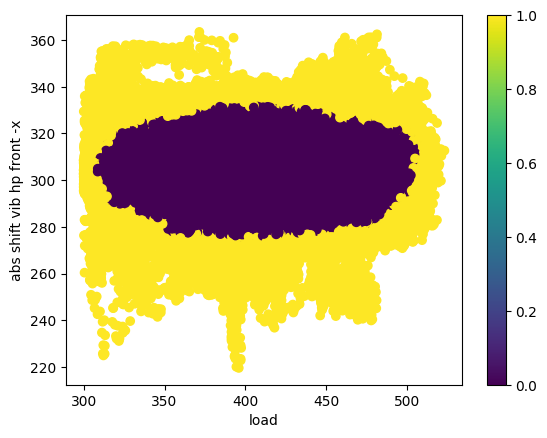

In [44]:
import pandas as pd
import numpy as np
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt





clf = IForest(n_estimators=100, contamination=0.1)
clf.fit(finalN.values)
clf.feature_names = list(finalN.columns)
y_pred = clf.predict(finalN.values)
# scores = clf.decision_function(finalN)

plt.scatter(finalN['load'], finalN['abs shift vib hp front -x'], c=y_pred)
plt.xlabel('load')
plt.ylabel('abs shift vib hp front -x')
plt.colorbar()
plt.show()


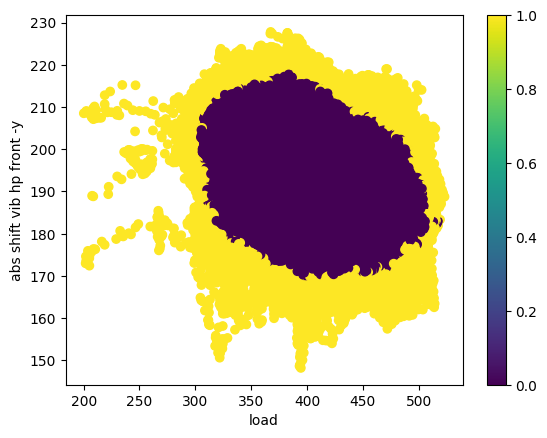

In [30]:
import pandas as pd
import numpy as np
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

# Generate some sample data with 300,000 points


# Perform anomaly detection using PyOD with Isolation Forest
clf = IForest(n_estimators=100, contamination=0.1)
clf.fit(finalN2.values)
clf.feature_names = list(finalN2.columns)
y_pred = clf.predict(finalN2.values)
# scores = clf.decision_function(finalN)

plt.scatter(finalN2['load'], finalN2['abs shift vib hp front -y'], c=y_pred)
plt.xlabel('load')
plt.ylabel('abs shift vib hp front -y')
plt.colorbar()
plt.show()


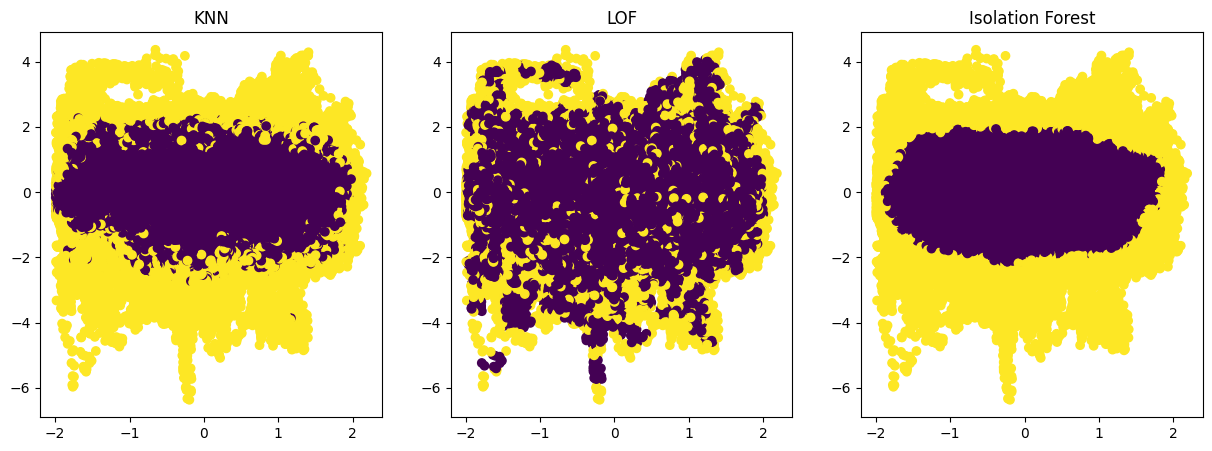

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest


# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(finalN)

# Initialize models
knn = KNN()
lof = LOF()
iforest = IForest()

# Fit models and make predictions
knn.fit(X)
y_pred_knn = knn.predict(X)

lof.fit(X)
y_pred_lof = lof.predict(X)

iforest.fit(X)
y_pred_iforest = iforest.predict(X)

# Visualize results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# KNN
axs[0].scatter(X[:, 0], X[:, 1], c=y_pred_knn)
axs[0].set_title("KNN")

# LOF
axs[1].scatter(X[:, 0], X[:, 1], c=y_pred_lof)
axs[1].set_title("LOF")

# Isolation Forest
axs[2].scatter(X[:, 0], X[:, 1], c=y_pred_iforest)
axs[2].set_title("Isolation Forest")

plt.show()


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest

def outlier_detection_visualization(X, y, model):
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit the outlier detection model
    model.fit(X_scaled)

    # Make predictions
    y_pred = model.predict(X_scaled)

    # Inverse transform the scaled data to get the original feature values
    X_inv = scaler.inverse_transform(X_scaled)

    # Plot the original data points and mark the anomalous points in red
    plt.scatter(X_inv[:, 0], X_inv[:, 1], c=np.where(y_pred == 1, 'blue', 'red'))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Outlier Detection with ' + type(model).__name__)
    plt.show()


In [ ]:
o

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def plot_anomalies(X, y=None, clf=None):
    # Fit the model and predict labels
    if clf is not None:
        y_pred = clf.fit_predict(X)
    else:
        raise ValueError('clf must be a PyOD model.')
    
    # Scale the data and predict labels again
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_pred_scaled = clf.predict(X_scaled)
    
    # If y is provided, use it to color code the scatter plot
    if y is not None:
        colors = np.array(['red', 'green'])
        plt.scatter(X[:, 0], X[:, 1], c=colors[y])
        plt.title('Ground Truth Labels')
        plt.show()
        plt.scatter(X[:, 0], X[:, 1], c=colors[y_pred])
        plt.title('Predicted Labels')
        plt.show()
        plt.scatter(X[:, 0], X[:, 1], c=colors[y_pred_scaled])
        plt.title('Predicted Labels (Scaled)')
        plt.show()
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y_pred)
        plt.title('Predicted Labels')
        plt.show()
        plt.scatter(X[:, 0], X[:, 1], c=y_pred_scaled)
        plt.title('Predicted Labels (Scaled)')
        plt.show()


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pyod.models.iforest import IForest

def plot_anomalies(X, y_pred):
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    
    # Apply PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    
    # Create a DataFrame with the scaled data and predicted labels
    df = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'y_pred': y_pred})
    
    # Plot the normal and anomalous data points separately
    normal = df[df['y_pred'] == 0]
    anomalous = df[df['y_pred'] == 1]
    
    plt.figure(figsize=(10, 7))
    plt.scatter(normal['PCA1'], normal['PCA2'], color='blue', label='Normal')
    plt.scatter(anomalous['PCA1'], anomalous['PCA2'], color='red', label='Anomalous')
    plt.title('Anomaly Detection Results')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.show()

# Generate sample data with 5 features
np.random.seed(42)
X = np.random.randn(300000, 5)

# Train an isolation forest model on the data
iforest = IForest(random_state=42)
iforest.fit(X)

# Predict the labels for the data
y_pred = iforest.predict(X)

# Plot the results


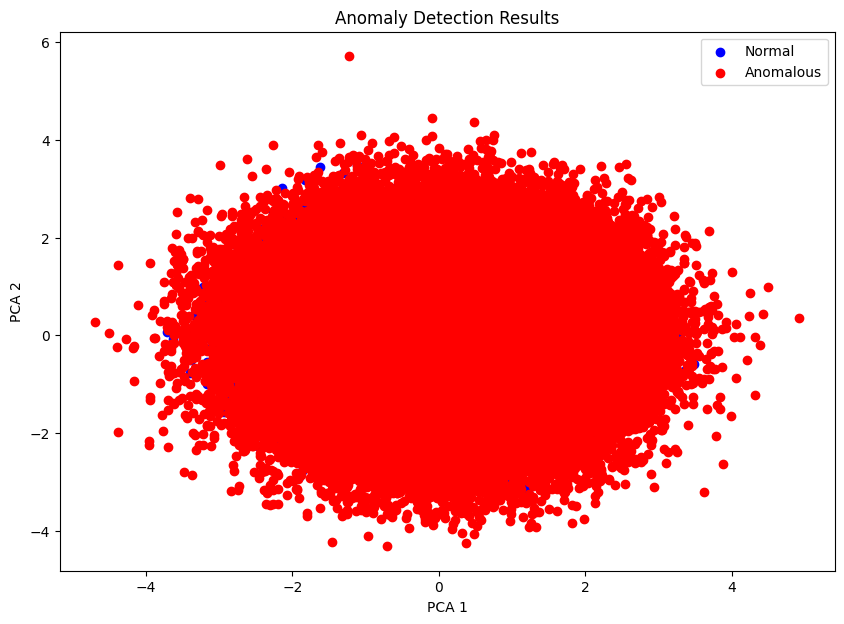

In [51]:
plot_anomalies(X, y_pred)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_anomalies_unsupervised(X, scores, outlier_fraction):
    # Get threshold
    threshold = np.quantile(scores, 1-outlier_fraction)

    # Get anomaly predictions
    y_pred = (scores >= threshold).astype(int)

    # Get anomalies
    anomalies = X[y_pred == 1]

    # Get normal points
    normal = X[y_pred == 0]

    # Plot the results
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(normal[:, 0], normal[:, 1], label='Normal', alpha=0.3, c='blue')
    ax.scatter(anomalies[:, 0], anomalies[:, 1], label='Anomalies', alpha=0.5, c='red')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    plt.show()


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest

def get_anomalies_with_plot(df, algo):
    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(df)
    
    # Fit the anomaly detection model
    if algo == 'abod':
        model = ABOD()
    elif algo == 'knn':
        model = KNN()
    elif algo == 'lof':
        model = LOF()
    elif algo == 'iforest':
        model = IForest()
    else:
        raise ValueError(f'Unknown algorithm {algo}')
    
    model.fit(X)
    y_pred = model.predict(X)
    
    # Invert the scaling to plot on original dataset
    finalN = scaler.inverse_transform(X)
    
    # Plot the results
    plt.scatter(finalN[:, 0], finalN[:, 1], c=y_pred)
    plt.colorbar()
    plt.show()
    
    # Return the anomalies
    return df[y_pred == 1]


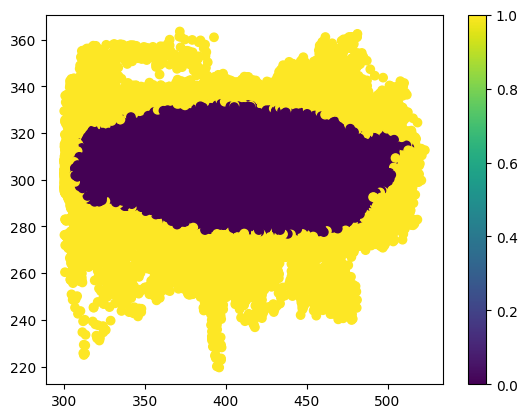

,load,abs shift vib hp front -x
797,481.33,279.96
798,480.21,278.42
799,480.48,278.72
800,480.84,278.61
801,480.32,282.45
...,...,...
307500,421.34,277.14
307501,420.22,276.92
307502,418.95,276.23
307503,419.20,275.42


In [55]:
get_anomalies_with_plot(finalN, "iforest")

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

def autoencoder_anomaly_detection(data, encoding_dim=64, epochs=50, batch_size=128, validation_split=0.2, verbose=0, plot=True):
    # Define the input shape of your data
    n_features = data.shape[1]
    input_shape = (n_features,)

    # Define the encoder and decoder layers
    input_data = Input(shape=input_shape)
    encoded = Dense(encoding_dim, activation='relu')(input_data)
    decoded = Dense(n_features, activation='sigmoid')(encoded)

    # Define the autoencoder model
    autoencoder = Model(input_data, decoded)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the model
    autoencoder.fit(data, data,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=validation_split,
                    verbose=verbose)

    # Use the trained autoencoder to detect anomalies
    mse = np.mean(np.power(data - autoencoder.predict(data), 2), axis=1)
    threshold = np.percentile(mse, 95)  # 95th percentile as threshold for anomalies
    anomalies = np.where(mse > threshold)[0]

    # Plot the anomalies
    if plot:
        plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5, label='normal')
        plt.scatter(data[anomalies, 0], data[anomalies, 1], c='red', alpha=0.5, label='anomaly')
        plt.legend()
        plt.show()

    return anomalies


In [57]:
autoencoder_anomaly_detection(finalN)

9409/9409 [==============================] - 9s 976us/step


InvalidIndexError: (slice(None, None, None), 0)

In [59]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

def autoencoder_anomaly_detection_withoutplot(data, encoding_dim=64, epochs=50, batch_size=128, validation_split=0.2, verbose=0):
    # Define the input shape of your data
    n_features = data.shape[1]
    input_shape = (n_features,)

    # Define the encoder and decoder layers
    input_data = Input(shape=input_shape)
    encoded = Dense(encoding_dim, activation='relu')(input_data)
    decoded = Dense(n_features, activation='sigmoid')(encoded)

    # Define the autoencoder model
    autoencoder = Model(input_data, decoded)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the model
    autoencoder.fit(data, data,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=validation_split,
                    verbose=verbose)

    # Use the trained autoencoder to detect anomalies
    mse = np.mean(np.power(data - autoencoder.predict(data), 2), axis=1)
    threshold = np.percentile(mse, 95)  # 95th percentile as threshold for anomalies
    anomalies = np.where(mse > threshold)[0]

    return anomalies


In [60]:
autoencoder_anomaly_detection_withoutplot(finalN)

9409/9409 [==============================] - 9s 959us/step


array([  3581,   3582,   3583, ..., 296613, 296614, 296615], dtype=int64)

In [62]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

def autoencoder_anomaly_detection_latest(data, encoding_dim=64, epochs=50, batch_size=128, validation_split=0.2, verbose=0):
    # Define the input shape of your data
    n_features = data.shape[1]
    input_shape = (n_features,)

    # Define the encoder and decoder layers
    input_data = Input(shape=input_shape)
    encoded = Dense(encoding_dim, activation='relu')(input_data)
    decoded = Dense(n_features, activation='sigmoid')(encoded)

    # Define the autoencoder model
    autoencoder = Model(input_data, decoded)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Train the model
    autoencoder.fit(data, data,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=validation_split,
                    verbose=verbose)

    # Use the trained autoencoder to detect anomalies
    reconstructed_data = autoencoder.predict(data)
    mse = np.mean(np.power(data - reconstructed_data, 2), axis=1)
    threshold = np.percentile(mse, 95)  # 95th percentile as threshold for anomalies
    anomalies = np.where(mse > threshold)[0]

    return anomalies, reconstructed_data


In [64]:
anomalies, reconstructed_data = autoencoder_anomaly_detection(finalN, encoding_dim=128, epochs=100, batch_size=256, validation_split=0.2, verbose=1)


Epoch 1/100
941/941 [==============================] - 2s 2ms/step - loss: -10894144.0000 - val_loss: -35098328.0000
Epoch 2/100
941/941 [==============================] - 2s 2ms/step - loss: -73718408.0000 - val_loss: -131753064.0000
Epoch 3/100
941/941 [==============================] - 1s 2ms/step - loss: -187052496.0000 - val_loss: -276634048.0000
Epoch 4/100
941/941 [==============================] - 2s 2ms/step - loss: -341368576.0000 - val_loss: -461475520.0000
Epoch 5/100
941/941 [==============================] - 2s 2ms/step - loss: -530807040.0000 - val_loss: -682196096.0000
Epoch 6/100
941/941 [==============================] - 2s 2ms/step - loss: -752726336.0000 - val_loss: -936837120.0000
Epoch 7/100
941/941 [==============================] - 2s 2ms/step - loss: -1005722368.0000 - val_loss: -1224283136.0000
Epoch 8/100
941/941 [==============================] - 2s 2ms/step - loss: -1289417856.0000 - val_loss: -1545216768.0000
Epoch 9/100
941/941 [==========================

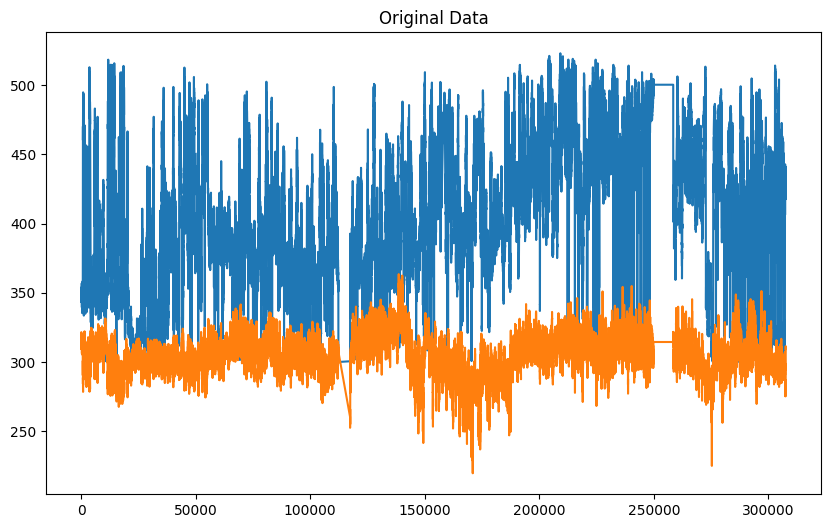

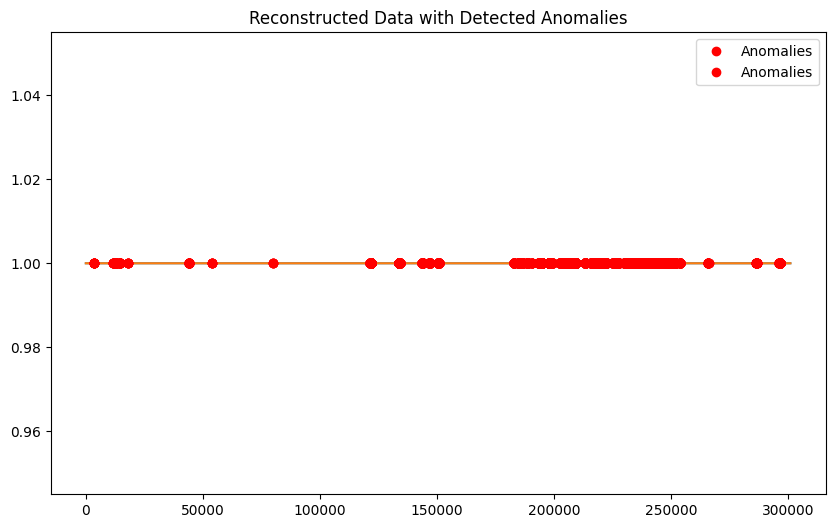

In [65]:
import matplotlib.pyplot as plt

# Plot the original dataset
plt.figure(figsize=(10, 6))
plt.plot(finalN)
plt.title('Original Data')
plt.show()

# Plot the reconstructed data with the detected anomalies
plt.figure(figsize=(10, 6))
plt.plot(reconstructed_data)
plt.plot(anomalies, reconstructed_data[anomalies], 'ro', label='Anomalies')
plt.legend()
plt.title('Reconstructed Data with Detected Anomalies')
plt.show()


In [ ]:
# Plot the results
plt.scatter(finalN[:, 0], finalN[:, 1], c=anomalies)
plt.colorbar()
plt.show()




In [73]:
import pandas as pd
import numpy as np
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt


def detect_anomalies(df, feature_names, contamination):
    X = df[feature_names].values

    # Fit the model
    clf = IForest(contamination=contamination, random_state=42)
    clf.fit(X)

    # Get the anomaly scores and predictions
    y_pred = clf.predict(X)
    scores = clf.decision_function(X)

    # Create a dataframe with the original data and the predictions and scores
    df_pred = pd.DataFrame(data=X, columns=feature_names)
    df_pred['Outlier'] = y_pred
    df_pred['Score'] = scores

    # Separate the anomalies and normal points
    anomalies, normals = df_pred[df_pred['Outlier'] == 1], df_pred[df_pred['Outlier'] == 0]

    # Plot the anomalies
    plt.figure(figsize=(12, 6))
    plt.scatter(normals.index, X[:, 0], color='blue', label='Normal')
    plt.scatter(anomalies.index, X[anomalies.index, 0], color='red', label='Anomaly')
    plt.legend(loc='upper left')
    plt.title('Isolation Forest Anomalies')
    plt.show()

    return anomalies, normals, df_pred


ValueError: x and y must be the same size

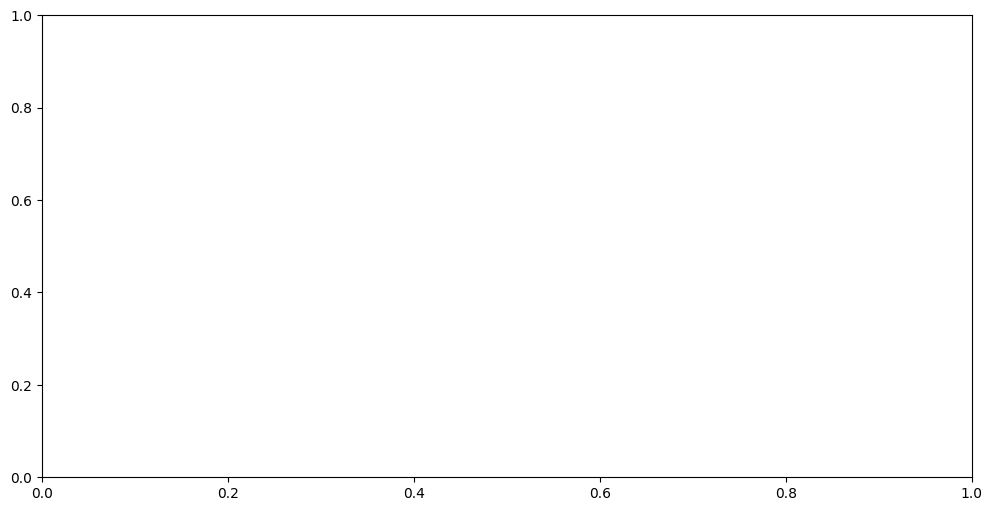

In [74]:

feature_names = ['load','abs shift vib hp front -x']
contamination = 0.05

results = detect_anomalies(finalN, feature_names, contamination)


In [87]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = finalN

# Standardize the data
data_std = (data - data.mean()) / data.std()

# Apply PCA
pca = PCA(n_components=0.95)
pca.fit(data_std)
data_pca = pca.transform(data_std)

# Reconstruct the data
data_reconstructed = pca.inverse_transform(data_pca)

# Compute the reconstruction error
reconstruction_error = np.sqrt(np.mean((data_std - data_reconstructed)**2, axis=1))

# Define a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 99)

# Identify anomalies
anomalies = data[reconstruction_error > threshold]

# Plot the anomalies on the original dataset
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data.index, data['load'], color='blue', alpha=0.5, label='Normal')
ax.scatter(anomalies.index, anomalies['column1'], color='red', alpha=0.5, label='Anomaly')
ax.legend(loc='best')
ax.set_xlabel('Index')
ax.set_ylabel('')
plt.show()


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_anomaly_detection(data, n_components, n_std=3, plot=True):
    """Performs PCA for anomaly detection on the input dataset.
    
    Args:
        data (pandas.DataFrame): Input dataset.
        n_components (int): Number of principal components to use.
        n_std (int): Number of standard deviations from the mean to use as the anomaly threshold.
        plot (bool): Whether to plot the anomalies on the original dataset.
        
    Returns:
        pandas.Series: A boolean series indicating whether each row is an anomaly or not.
    """
    # Standardize the data
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca.fit(data_std)
    scores = pca.transform(data_std)
    recon = pca.inverse_transform(scores)
    mse = np.mean(np.power(data_std - recon, 2), axis=1)
    
    # Identify anomalies
    std = np.std(mse)
    threshold = n_std * std
    is_anomaly = mse > threshold
    
    # Plot anomalies on original dataset
    if plot:
        fig, ax = plt.subplots()
        ax.scatter(data.index, data.iloc[:, 0], color='blue')
        ax.scatter(data.index[is_anomaly], data.iloc[:, 0][is_anomaly], color='red')
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        ax.set_title('Anomaly Detection')
        plt.show()
    
    return pd.Series(is_anomaly, index=data.index)


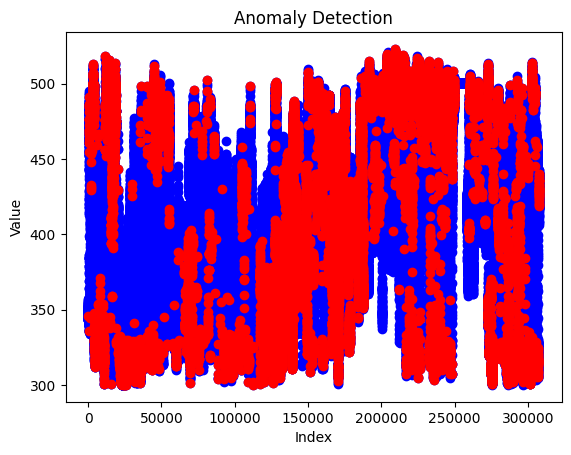

0         False
1         False
2         False
3         False
4         False
          ...  
307625    False
307626    False
307627    False
307628    False
307629    False
Length: 301078, dtype: bool


In [90]:

data = finalN


anomalies = pca_anomaly_detection(data, n_components=2, n_std=2, plot=True)

# Print the anomalies
print(anomalies)


In [100]:
finalN

,load,abs shift vib hp front -x
0,349.48,317.10
1,349.57,315.30
2,349.98,315.74
3,349.73,314.79
4,349.54,315.08
...,...,...
307625,430.98,309.63
307626,431.37,311.42
307627,431.97,309.74
307628,431.84,310.51


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def find_anomalies(df, fixed_variable, n_components=2, contamination=0.05):
    # Extract the fixed variable and the other variables
    fixed_var = df[fixed_variable]
    other_vars = df.drop(fixed_variable, axis=1)

    # Standardize the other variables
    scaler = StandardScaler()
    other_vars_std = scaler.fit_transform(other_vars)

    # Fit PCA to the standardized other variables
    pca = PCA(n_components=n_components)
    pca.fit(other_vars_std)

    # Calculate the Mahalanobis distance for each point
    mahal_dist = np.sqrt(pca.mahalanobis(other_vars_std))

    # Find the threshold for anomalies using the specified contamination level
    threshold = np.quantile(mahal_dist, 1 - contamination)

    # Identify the anomalies
    anomalies = df[mahal_dist > threshold]

    # Plot the anomalies against the fixed variable
    fig, ax = plt.subplots()
    ax.scatter(fixed_var, np.zeros_like(fixed_var), color='blue')
    ax.scatter(anomalies[fixed_variable], np.zeros_like(anomalies[fixed_variable]), color='red')
    plt.show()

    return anomalies


In [95]:
find_anomalies(finalN,finalN["load"], n_components=1, contamination=0.05)

KeyError: "None of [Float64Index([349.48, 349.57, 349.98, 349.73, 349.54, 348.72, 349.29, 349.18,\n               348.5, 348.44,\n              ...\n              434.69, 433.37, 432.17, 432.69, 431.51, 430.98, 431.37, 431.97,\n              431.84, 431.62],\n             dtype='float64', length=301078)] are in the [columns]"

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_anomaly_pca(df, fixed_var, n_components, threshold):
    # Extract the fixed variable column and drop it from the original DataFrame
    fixed_var_col = df[fixed_var]
    df = df.drop(fixed_var, axis=1)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca.fit(df)
    
    # Calculate the distances of each data point to the PCA hyperplane
    distances = pca.transform(df)
    distances = np.linalg.norm(distances, axis=1)
    
    # Create a boolean mask to identify anomalies
    mask = distances > threshold
    
    # Plot the anomalies against the fixed variable
    if fixed_var in df.columns:
        plt.scatter(fixed_var_col[mask], distances[mask])
        plt.xlabel(fixed_var)
        plt.ylabel('Distance from PCA hyperplane')
        plt.show()
    else:
        print(f"Column {fixed_var} not found in DataFrame.")


In [99]:
plot_anomaly_pca(finalN, finalN['load'], n_components= 1, threshold= 0.5)

KeyError: "None of [Float64Index([349.48, 349.57, 349.98, 349.73, 349.54, 348.72, 349.29, 349.18,\n               348.5, 348.44,\n              ...\n              434.69, 433.37, 432.17, 432.69, 431.51, 430.98, 431.37, 431.97,\n              431.84, 431.62],\n             dtype='float64', length=301078)] are in the [columns]"

In [101]:
import pandas as pd

# create a sample dataframe with daily frequency
df1 = pd.DataFrame({
    'Date': pd.date_range('2022-01-01', '2022-01-31', freq='D'),
    'Value1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
})

# create a sample dataframe with hourly frequency
df2 = pd.DataFrame({
    'DateTime': pd.date_range('2022-01-01', '2022-01-31', freq='H'),
    'Value2': range(744)
})

# resample df2 to daily frequency
df2 = df2.set_index('DateTime').resample('D').mean().reset_index()

# merge the dataframes on the date column
df_merged = pd.merge(df1, df2, left_on='Date', right_on='DateTime')

# print the merged dataframe
print(df_merged)


ValueError: All arrays must be of the same length

In [102]:
import pandas as pd

def calculate_stats(df):
    min_vals = df.min()
    max_vals = df.max()
    avg_vals = df.mean()
    
    stats_df = pd.DataFrame({
        'min': min_vals,
        'max': max_vals,
        'avg': avg_vals
    })
    
    return stats_df

In [103]:
calculate_stats(finalN)

,min,max,avg
load,300.01,523.09,406.371322
abs shift vib hp front -x,219.60,363.50,304.994850
